In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

## Read data from the dataset.

In [2]:
f = pd.read_csv('RAW_recipes.csv')

In [3]:
f.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [4]:
f.shape[0]

231637

## Most similar recipe

In [5]:
iPerR = defaultdict(set)
rPerI = defaultdict(set)

In [6]:
for j in range(f.shape[0]):
    ingredientList = eval(f["ingredients"][j])
    for i in range(len(ingredientList)):
        ingredient, recipe = ingredientList[i], f['name'][j]
        iPerR[recipe].add(ingredient)
        rPerI[ingredient].add(recipe)

In [7]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    return numer / denom

In [8]:
def mostSimilar_recipe(i):
    similarities = []
    ing = iPerR[i]
    for i2 in iPerR:
        if i2 == i: continue
        sim = Jaccard(ing, iPerR[i2])
        similarities.append((sim,i2))
    similarities.sort(key=lambda x: (-x[0]))
    return similarities[:5]

In [9]:
query = f['name'][500]

In [10]:
query

'perfect chocolate cake  mccall s cooking school'

In [11]:
iPerR['perfect chocolate cake  mccall s cooking school']

{'all-purpose flour',
 'baking powder',
 'baking soda',
 'boiling water',
 'butter',
 "confectioners' sugar",
 'eggs',
 'heavy cream',
 'light cream',
 'salt',
 'semisweet chocolate pieces',
 'sugar',
 'unsweetened cocoa',
 'vanilla',
 'vanilla extract'}

In [12]:
iPerR['tex mex chocolate sheet cake   the best']

{'all-purpose flour',
 'baking powder',
 'baking soda',
 'boiling water',
 'butter',
 'buttermilk',
 'eggs',
 'heavy cream',
 'mexican chocolate',
 'pecans',
 'salt',
 'sugar',
 'unsweetened cocoa',
 'vanilla extract'}

In [13]:
theList = mostSimilar_recipe(query)

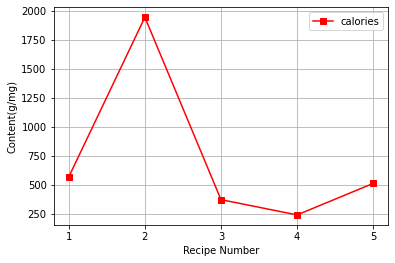

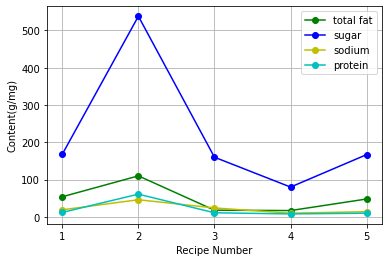

In [14]:
list1 = eval(f.iloc[f[f.name == theList[0][1]].index.tolist()[0]]["nutrition"])
list2 = eval(f.iloc[f[f.name == theList[1][1]].index.tolist()[0]]["nutrition"])
list3 = eval(f.iloc[f[f.name == theList[2][1]].index.tolist()[0]]["nutrition"])
list4 = eval(f.iloc[f[f.name == theList[3][1]].index.tolist()[0]]["nutrition"])
list5 = eval(f.iloc[f[f.name == theList[4][1]].index.tolist()[0]]["nutrition"])

x = [1, 2, 3, 4, 5]
k1 = [list1[0], list2[0], list3[0], list4[0], list5[0]]
plt.plot(x, k1, 's-', color='r', label="calories")
plt.xticks(x)
plt.xlabel("Recipe Number")
plt.ylabel("Content(g/mg)")
plt.legend(loc="best")
plt.grid()
plt.savefig("Recipe number vs. Calories.jpg")
plt.show()

x = [1, 2, 3, 4, 5]
k2 = [list1[1],list2[1],list3[1],list4[1],list5[1]]
k3 = [list1[2],list2[2],list3[2],list4[2],list5[2]]
k4 = [list1[3],list2[3],list3[3],list4[3],list5[3]]
k5 = [list1[4],list2[4],list3[4],list4[4],list5[4]]
plt.xticks(x)
plt.plot(x,k2,'o-',color = 'g',label="total fat")
plt.plot(x,k3,'o-',color = 'b',label="sugar")
plt.plot(x,k4,'o-',color = 'y',label="sodium")
plt.plot(x,k5,'o-',color = 'c',label="protein")
plt.xlabel("Recipe Number")
plt.ylabel("Content(g/mg)")
plt.legend(loc="best")
plt.grid()
plt.savefig("Recipe number vs. content.jpg")
plt.show()

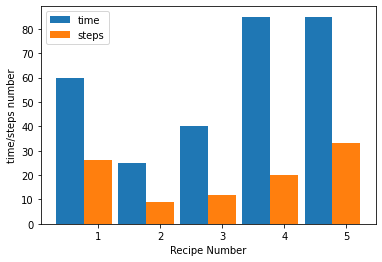

In [26]:
k1, k2 = [], []
for i in range(5):
    k1.append(f.iloc[f[f.name == theList[i][1]].index.tolist()[0]]["minutes"])
    k2.append(f.iloc[f[f.name == theList[i][1]].index.tolist()[0]]["n_steps"])
fig, ax = plt.subplots()
x = [1, 2, 3, 4, 5]
ax.bar(np.arange(5), k1, tick_label=x, width=0.45, label='time')
ax.bar(np.arange(5) + 0.45, k2, tick_label=x, width=0.45, label='steps')
plt.xlabel("Recipe Number")
plt.ylabel("time/steps number")
ax.legend()
plt.savefig("Recipe number vs. time or steps.jpg")
plt.show()

## Most similar ingredient

In [200]:
def mostSimilar_ingredient(i):
    similarities = []
    reci = rPerI[i]
    for i2 in rPerI:
        if i2 == i: continue
        sim = Jaccard(reci, rPerI[i2])
        similarities.append((sim,i2))
    similarities.sort(key=lambda x: (-x[0], x[1]))
    return similarities[:5]

In [201]:
mostSimilar_ingredient('cherries')

[(0.02, 'grenadine'),
 (0.01702127659574468, 'blue curacao'),
 (0.016304347826086956, 'cherry juice'),
 (0.015957446808510637, 'kirsch'),
 (0.015086206896551725, 'orange slice')]

## Recommendation

### Just use similarity

In [31]:
query = f['name'][20000]

In [32]:
query

'beef and cheese squares'

In [33]:
iPerR[query]

{'baking powder',
 'cheddar cheese',
 'flour',
 'garlic powder',
 'ground chuck',
 'milk',
 'mushrooms',
 'onion',
 'pepper',
 'salt',
 'shortening',
 'sour cream'}

In [34]:
ing = {'cinnamon', 
      'cherries', 
      'butterscotch', 
      'vodkag'}

In [35]:
ing = {'lettuce heart', 
       'butterscotch',
       'low-fat bacon'}

In [36]:
ing = {'cheese', 'pepper', 'onion', 'chicken'}

In [37]:
similarities2 = []
for i2 in iPerR:
    sim = Jaccard(ing, iPerR[i2])
    similarities2.append((sim,i2,iPerR[i2]))
similarities2.sort(key=lambda x: (-x[0]))
for j in range(10):
    print(similarities2[j])

(0.5, 'chicken cheese ball', {'cream cheese', 'chicken', 'onion', 'cheese', 'mustard'})
(0.42857142857142855, 'avgolemono soup  chicken soup', {'rice', 'onion', 'avgolemono sauce', 'salt', 'pepper', 'chicken'})
(0.42857142857142855, 'omelets in a bag', {'onion', 'cheese', 'salt', 'eggs', 'pepper', 'ham'})
(0.4, 'cheese rolls', {'cheese', 'pepper', 'white bread'})
(0.4, 'cheese  cheese   onion  beef   cheese enchilada fillings', {'cheese', 'hamburger', 'onion'})
(0.4, 'cheesy hash browns for one', {'cheese', 'potato', 'onion'})
(0.4, 'leftover salsa chicken and cheese', {'cheese', 'salsa', 'chicken'})
(0.375, 'basic cabbage soup', {'green cabbage', 'onion', 'salt', 'butter', 'pepper', 'chicken', 'cheddar cheese'})
(0.375, 'bean   cheese casserole', {'prepared mustard', 'onion', 'cheese', 'black beans', 'pepper', 'diced tomatoes', 'potatoes'})
(0.375, 'cheese and tomato pie', {'onion', '9 inch pie shell', 'salt', 'cheese', 'eggs', 'pepper', 'tomatoes'})


In [38]:
num_list = [i[1] for i in similarities2[0:5]]
prob = [i[0] for i in similarities2[0:5]]

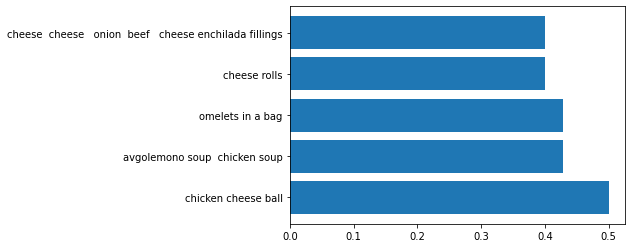

In [39]:
plt.barh(range(len(prob)), prob, tick_label = num_list)
# plt.savefig('top10.jpg')
plt.show()

In [42]:
list1 = eval(f.iloc[f[f.name == num_list[0]].index.tolist()[0]]["nutrition"])
list2 = eval(f.iloc[f[f.name == num_list[1]].index.tolist()[0]]["nutrition"])
list3 = eval(f.iloc[f[f.name == num_list[2]].index.tolist()[0]]["nutrition"])
list4 = eval(f.iloc[f[f.name == num_list[3]].index.tolist()[0]]["nutrition"])
list5 = eval(f.iloc[f[f.name == num_list[4]].index.tolist()[0]]["nutrition"])

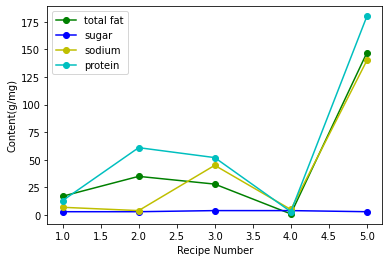

In [44]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5]
# k1 = [list1[0],list2[0],list3[0],list4[0],list5[0]]
k2 = [list1[1],list2[1],list3[1],list4[1],list5[1]]
k3 = [list1[2],list2[2],list3[2],list4[2],list5[2]]
k4 = [list1[3],list2[3],list3[3],list4[3],list5[3]]
k5 = [list1[4],list2[4],list3[4],list4[4],list5[4]]
# plt.plot(x,k1,'s-',color = 'r',label="calories")
plt.plot(x,k2,'o-',color = 'g',label="total fat")
plt.plot(x,k3,'o-',color = 'b',label="sugar")
plt.plot(x,k4,'o-',color = 'y',label="sodium")
plt.plot(x,k5,'o-',color = 'c',label="protein")
plt.xlabel("Recipe Number")
plt.ylabel("Content(g/mg)")
plt.legend(loc = "best")
plt.savefig("Recipe number vs. content.jpg")
# plt.savefig("Recipe number vs. Calories.jpg")
plt.show()

In [67]:
k1, k2 = [], []

In [68]:
for i in range(5):
    k1.append(f.iloc[f[f.name == num_list[i]].index.tolist()[0]]["minutes"])
    k2.append(f.iloc[f[f.name == num_list[i]].index.tolist()[0]]["n_steps"])

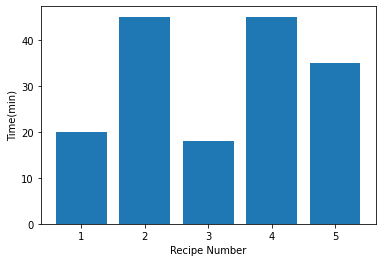

In [69]:
x = [1,2,3,4,5]
plt.bar(x, k1, tick_label = x)
plt.xlabel("Recipe Number")
plt.ylabel("Time(min)")
# plt.savefig("Recipe number vs. Calories.jpg")
plt.show()

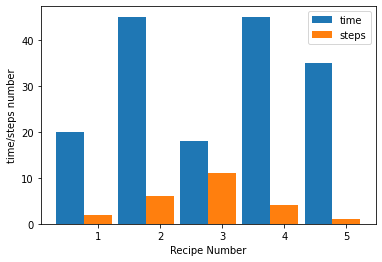

In [70]:
fig, ax = plt.subplots()
x = [1,2,3,4,5]
ax.bar(np.arange(5), k1, tick_label = x, width = 0.45, label = 'time')
ax.bar(np.arange(5) + 0.45, k2, tick_label = x, width = 0.45, label = 'steps')
plt.xlabel("Recipe Number")
plt.ylabel("time/steps number")
ax.legend()
plt.savefig("Recipe number vs. time or steps.jpg")
plt.show()

### Rank all the ingredients

In [221]:
ingredients = []
for i in range(f.shape[0]):
    ingredients.extend(eval(f['ingredients'][i]))

In [222]:
dict = {}
for key in ingredients:
    dict[key] = dict.get(key, 0) + 1

In [223]:
ingredients_sort = sorted(dict.items(), key=lambda x: x[1], reverse=True)

In [224]:
ingredient_top50 = []
for i in range(50):
    ingredient_top50.append(ingredients_sort[i][0])

In [225]:
ingredient_top50[0:10]

['salt',
 'butter',
 'sugar',
 'onion',
 'water',
 'eggs',
 'olive oil',
 'flour',
 'milk',
 'garlic cloves']

In [226]:
dict['sugar']

44535

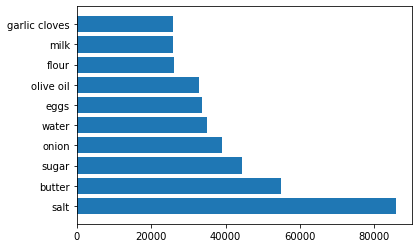

In [227]:
num_list = [dict[i] for i in ingredient_top50[0:10]]
plt.barh(range(len(num_list)), num_list, tick_label = ingredient_top50[0:10])
plt.savefig('top10.jpg')
plt.show()

Now the problem is that some ingredients does not exist in the dataset. We need to find similar ingredients.
What I did in this step is to find some similar ingredients as new input.

In [311]:
new = []

In [312]:
s = 'lettuce heart'
for i in dict:
    if s.find(i) != -1:
        if dict[i] > 300:
            new.append(i)   

In [313]:
s = 'butterscotch'
for i in dict:
    if s.find(i) != -1:
        if dict[i] > 300:
            new.append(i) 

In [314]:
s = 'low fat bacon'
for i in dict:
    if s.find(i) != -1:
         if dict[i] > 300:
            new.append(i)

In [315]:
new

['lettuce', 'butter', 'bacon']

In [306]:
dict2 = {}
for key in dict:
    if key.find('butterscotch') != -1:
        dict2[key] = dict[key]
ww = sorted(dict2.items(), key=lambda x: x[1], reverse=True)
if dict[ww[0][0]] > 300:
    new.append(ww[0][0])

In [307]:
dict3 = {}
for key in dict:
    if key == 'lettuce heart': continue
    if key.find('lettuce heart') != -1:
        dict3[key] = dict[key]
ww2 = sorted(dict3.items(), key=lambda x: x[1], reverse=True)
if dict[ww2[0][0]] > 300:
    new.append(ww2[0][0])

In [308]:
dict4 = {}
for key in dict:
    if key == 'low fat bacon': continue
    if key.find('low fat bacon') != -1:
        dict4[key] = dict[key]
ww3 = sorted(dict4.items(), key=lambda x: x[1], reverse=True)
if dict[ww3[0][0]] > 300:
    new.append(ww3[0][0])

In [320]:
new

['lettuce', 'butter', 'bacon']

In [321]:
ing = set(new)

In [322]:
def similarity(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    return numer / denom

In [323]:
similarities2 = []
for i2 in iPerR:
    sim = similarity(ing, iPerR[i2])
    similarities2.append((sim,i2,iPerR[i2]))
similarities2.sort(key=lambda x: (-x[0]))
for j in range(5):
    print(similarities2[j])

(0.5, 'grilled vidalia onions', {'butter', 'vidalia onions', 'bacon'})
(0.5, 'mr robinsons  butter beans', {'butter', 'butter beans', 'bacon'})
(0.4, 'bake in  oozy bread', {'butter', 'real maple syrup', 'refrigerated buttermilk biscuits', 'bacon'})
(0.4, 'bacon and peanut butter on crispy toast appetizer', {'white bread', 'butter', 'creamy peanut butter', 'bacon'})
(0.4, 'bacon pinwheels', {'lettuce', 'flour tortillas', 'cream cheese', 'bacon'})
